In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the CDS spread data for JP Morgan and Morgan Stanley from a CSV file
data = pd.read_csv("/content/drive/MyDrive/Combined_CDS_Spread_New.csv")
#JP is ourself
#MS is counterparty

In [ ]:
print(data.head())

     Date  JPM_Spread  MS_Spread
0  14-Jan      0.7532     1.0148
1  14-Feb      0.6191     0.8766
2  14-Mar      0.5696     0.8717
3  14-Apr      0.5595     0.7380
4  14-May      0.5613     0.7224


In [ ]:
# Renaming columns for clarity
data.rename(columns={'JPM_Spread':'JP', 'MS_Spread':'MS'},inplace=True)
print(data.head())

     Date      JP      MS
0  14-Jan  0.7532  1.0148
1  14-Feb  0.6191  0.8766
2  14-Mar  0.5696  0.8717
3  14-Apr  0.5595  0.7380
4  14-May  0.5613  0.7224


In [ ]:
# Downsampling the data for analysis -Quater Wise
data = data.iloc[::3, :]
print(data.head())

      Date      JP      MS
0   14-Jan  0.7532  1.0148
3   14-Apr  0.5595  0.7380
6   14-Jul  0.6240  0.7577
9   14-Oct  0.5842  0.7875
12  15-Jan  0.7306  0.8275


In [ ]:
# Calculating hazard rates
data['JP_lambda']=data['JP']/(1-0.45)  #0.45 is our RR

# Calculating hazard rates
data['MS_lambda']=data['MS']/(1-0.60)  #0.60 is counterparty RR
print(data.head())

      Date      JP      MS  JP_lambda  MS_lambda
0   14-Jan  0.7532  1.0148   1.369455    2.53700
3   14-Apr  0.5595  0.7380   1.017273    1.84500
6   14-Jul  0.6240  0.7577   1.134545    1.89425
9   14-Oct  0.5842  0.7875   1.062182    1.96875
12  15-Jan  0.7306  0.8275   1.328364    2.06875


In [ ]:
#Just to Make 0.25 , 0.5 -Time Steps
data['time']= ((data.index /3)+ 1  ) * 0.25
print(data.head())

      Date      JP      MS  JP_lambda  MS_lambda  time
0   14-Jan  0.7532  1.0148   1.369455    2.53700  0.25
3   14-Apr  0.5595  0.7380   1.017273    1.84500  0.50
6   14-Jul  0.6240  0.7577   1.134545    1.89425  0.75
9   14-Oct  0.5842  0.7875   1.062182    1.96875  1.00
12  15-Jan  0.7306  0.8275   1.328364    2.06875  1.25


In [ ]:
# CDS Spread Visualization
fig = go.Figure()

# Add traces for 'JP' and 'MS' using the 'time' column as x-axis
fig.add_trace(go.Scatter(x=data['time'], y=data['JP'], mode='lines', name='JP'))
fig.add_trace(go.Scatter(x=data['time'], y=data['MS'], mode='lines', name='MS'))

fig.update_layout(
    title='CDS Spreads over Time',
    xaxis_title='Time',
    yaxis_title='Spread (bps)'
)

fig.show()


In [ ]:
#Hazard Rate Plot
fig = go.Figure()


fig.add_trace(go.Scatter(x=data['time'], y=data['JP_lambda'], mode='lines', name='JP_lambda'))
fig.add_trace(go.Scatter(x=data['time'], y=data['MS_lambda'], mode='lines', name='MS_lambda'))

fig.update_layout(
    title='Hazard Rates over Time',
    xaxis_title='Time',
    yaxis_title='Hazard Rate'
)

fig.show()

In [ ]:
#Marginal PD Calculation
#data['Difference'] = data['Value'] - data['Value'].shift(-1) e^lambda1*time1 - e^lambda2*time2 (0.25 and 0.5)
#shift brings the next value
data['JP_M_PD']=np.exp(-(data['JP_lambda']*data['time'])) -   np.exp(-(data['JP_lambda'].shift(-1)*data['time'].shift(-1)))
data['MS_M_PD']=np.exp(-(data['MS_lambda']*data['time'])) -   np.exp(-(data['MS_lambda'].shift(-1)*data['time'].shift(-1)))
print(data.head())

      Date      JP      MS  JP_lambda  MS_lambda  time   JP_M_PD   MS_M_PD  \
0   14-Jan  0.7532  1.0148   1.369455    2.53700  0.25  0.108775  0.132809   
3   14-Apr  0.5595  0.7380   1.017273    1.84500  0.50  0.174288  0.155976   
6   14-Jul  0.6240  0.7577   1.134545    1.89425  0.75  0.081326  0.101917   
9   14-Oct  0.5842  0.7875   1.062182    1.96875  1.00  0.155648  0.064306   
12  15-Jan  0.7306  0.8275   1.328364    2.06875  1.25  0.014436  0.020151   

    JP_CumPD  MS_CumPD  
0   0.108775  0.132809  
3   0.283063  0.288785  
6   0.364389  0.390702  
9   0.520037  0.455008  
12  0.534474  0.475158  


In [ ]:
# Calculating cumulative default probabilities
data['JP_CumPD']=data['JP_M_PD'].cumsum()

# Calculating cumulative default probabilities
data['MS_CumPD']=data['MS_M_PD'].cumsum()
print(data.head())
print(data.tail())

      Date      JP      MS  JP_lambda  MS_lambda  time   JP_M_PD   MS_M_PD  \
0   14-Jan  0.7532  1.0148   1.369455    2.53700  0.25  0.108775  0.132809   
3   14-Apr  0.5595  0.7380   1.017273    1.84500  0.50  0.174288  0.155976   
6   14-Jul  0.6240  0.7577   1.134545    1.89425  0.75  0.081326  0.101917   
9   14-Oct  0.5842  0.7875   1.062182    1.96875  1.00  0.155648  0.064306   
12  15-Jan  0.7306  0.8275   1.328364    2.06875  1.25  0.014436  0.020151   

    JP_CumPD  MS_CumPD  
0   0.108775  0.132809  
3   0.283063  0.288785  
6   0.364389  0.390702  
9   0.520037  0.455008  
12  0.534474  0.475158  
       Date      JP      MS  JP_lambda  MS_lambda   time   JP_M_PD  \
108  23-Jan  0.6523  0.8015   1.186000    2.00375   9.25  0.000016   
111  23-Apr  0.7717  0.9801   1.403091    2.45025   9.50 -0.000112   
114  23-Jul  0.5122  0.6569   0.931273    1.64225   9.75  0.000110   
117  23-Oct  0.6818  0.9801   1.239636    2.45025  10.00 -0.000262   
120  24-Jan  0.4416  0.6417   0

In [ ]:
#Plot Cumulative Default Probabilities:
fig = go.Figure()


fig.add_trace(go.Scatter(x=data['time'], y=data['JP_CumPD'], mode='lines', name='JP_CumPD'))
fig.add_trace(go.Scatter(x=data['time'], y=data['MS_CumPD'], mode='lines', name='MS_CumPD'))

fig.update_layout(
    title='Cumulative Default Probabilities',
    xaxis_title='Time',
    yaxis_title='Cumulative Probability'
)


fig.show()


In [ ]:
Our_CumPD=data['JP_CumPD'].iloc[-2]
CP_CumPD=data['MS_CumPD'].iloc[-2]
print(data['MS_CumPD'].iloc[-2]) #Counterparty's cumulative PD - For cVa
print(data['JP_CumPD'].iloc[-2]) #Our cumulative PD - For dVa


0.5303330167964186
0.70982335843477


In [ ]:
#Simualting Values of IRS with Vaiscek Model

# Defining a function to simulate interest rates using the Vasicek model
def simulate_vasicek(a,b,sigma,r0,T,dt,n_paths):
  n_steps=int(T/dt)
  rates=np.zeros((n_steps+1,n_paths))
  rates[0]=r0
  for step in range(1,n_steps+1):
    dw=np.random.normal(0,np.sqrt(dt), n_paths)
    rates[step]=rates[step-1] + a * (b-rates[step-1]) * dt +sigma *dw

  return rates

In [ ]:
# Define model parameters
a = 0.1  # Mean Reversion Rate
b = 0.05  # Long-Term Mean or Equilibrium Level
sigma = 0.01  # Volatility of Interest Rates
r0 = 0.05  # Initial Interest Rate
T = 10  # Time to Maturity
dt = 0.25  # Time Step
n_paths = 1000  # Number of Paths

In [ ]:
# Simulate interest rates using the Vasicek model
simulated_rates = simulate_vasicek(a, b, sigma, r0, T, dt, n_paths)

# Compute discount factors using exponential functions
discount_factors = np.exp(-simulated_rates * np.arange(0, simulated_rates.shape[0])[:, None] * dt)

# Initialize simulation data dictionary
simulation_data = {'DF': []}

# Calculate average discount factors
simulation_data['DF'] = discount_factors.mean(axis=1)

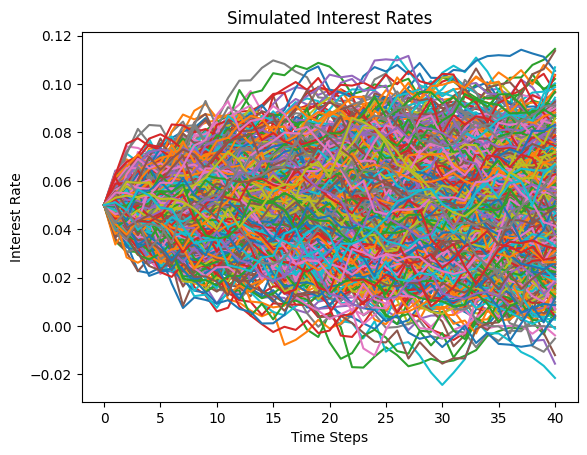

In [ ]:
#Vasicek model simulation

plt.plot(simulated_rates)
plt.title('Simulated Interest Rates')
plt.xlabel('Time Steps')
plt.ylabel('Interest Rate')
plt.show()

In [ ]:
results_df=pd.DataFrame(simulation_data,index=np.arange(0,T+dt,dt))

In [ ]:
print(results_df.head())

            DF
0.00  1.000000
0.25  0.987635
0.50  0.975333
0.75  0.963382
1.00  0.951484


In [ ]:
fig = go.Figure()

# Iterate through the columns of 'results_df' to add traces
for column in results_df.columns:
    fig.add_trace(go.Scatter(x=results_df.index, y=results_df[column], mode='lines', name=column))

# Update the layout with labels and title
fig.update_layout(
    title='Discount Factor vs. Time',
    xaxis_title='Time',
    yaxis_title='Discount Factor'
)

# Show the plot
fig.show()

In [ ]:
# Define contract parameters
notional = 1
fixed_rate = 0.055
payment_frequency = 1



In [ ]:
# Initialize present value array
mtm_values = np.zeros_like(simulated_rates)

In [ ]:
# Calculate MtM values
for step in range(1, mtm_values.shape[0]):
    time_to_maturity = T - step * dt

    # Calculate fixed leg present value
    fixed_leg_pv = notional * fixed_rate * np.exp(-simulated_rates[step] * time_to_maturity)

    # Calculate floating leg present value
    floating_leg_pv = notional * simulated_rates[step] * np.exp(-simulated_rates[step] * time_to_maturity)

    # Calculate MtM value for this step
    mtm_values[step] = fixed_leg_pv - floating_leg_pv



In [ ]:
# Calculate expected exposure (EE)
EE = mtm_values

# Calculate average MtM across paths
average_MtM = mtm_values.mean(axis=1)

In [ ]:
# Create a dictionary for simulation results
data1 = {'Time': np.arange(0, T + dt, dt),
         'Average MtM': average_MtM,
         'DF': simulation_data['DF']
         }

# Add individual run paths to the data dictionary
for path in range(n_paths):
    data1[f'Run {path + 1}'] = mtm_values[:, path]

# Create a DataFrame for the simulation results
results_df1 = pd.DataFrame(data1)

In [ ]:

print(results_df1.head())

   Time  Average MtM        DF     Run 1     Run 2     Run 3     Run 4  \
0  0.00     0.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
1  0.25     0.003368  0.987635  0.003201  0.004301  0.000412  0.002318   
2  0.50     0.003430  0.975333  0.001627 -0.001049 -0.002436 -0.003269   
3  0.75     0.003738  0.963382  0.003414  0.000097 -0.001427 -0.001204   
4  1.00     0.003873  0.951484  0.000003 -0.000184  0.002382  0.001688   

      Run 5     Run 6     Run 7  ...   Run 991   Run 992   Run 993   Run 994  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1  0.010854  0.006010 -0.000500  ...  0.003643  0.008477  0.003352  0.001584   
2  0.007215  0.008497 -0.001454  ...  0.007351  0.012038  0.003287  0.005806   
3  0.003210  0.006574  0.001986  ... -0.000440  0.007107  0.000785  0.007774   
4  0.001420  0.004274  0.005198  ... -0.000596  0.007177 -0.000143  0.008140   

    Run 995   Run 996   Run 997   Run 998   Run 999  Run 1000  
0  0.00000

In [ ]:

fig = go.Figure()

# Add the main line for 'Time' vs. 'Average MtM'
fig.add_trace(go.Scatter(x=results_df1['Time'], y=results_df1['Average MtM'], mode='lines', name='Average MtM'))

# Select specific runs to add to the plot from 'Run 1' to 'Run 1000'
for run in range(1, 1001):
    fig.add_trace(go.Scatter(x=results_df1['Time'], y=results_df1[f'Run {run}'], mode='lines', name=f'Run {run}'))

# Add labels and a title
fig.update_layout(xaxis_title='Time', yaxis_title='Values', title='Values vs. Time')

# Show the plot
fig.show()



In [ ]:
#Now the CVA Calculation

def create_dataframe():

    np.random.seed(987654321)
    # Generating a series of numbers from 1 to 1000
    numbers = pd.Series(range(1, 1001))

    # Generating a series of 1000 random numbers between 0 and 1
    random_numbers = pd.Series(np.random.rand(1000))

    # Creating a DataFrame with two columns
    df = pd.DataFrame({'Runs': numbers, 'Random_No': random_numbers})

    return df

In [ ]:
# Create the DataFrame
df = create_dataframe()
df.head()

,Runs,Random_No
0,1,0.072988
1,2,0.216037
2,3,0.464753
3,4,0.622590
4,5,0.618388


In [ ]:
#Adding Default Indicator
df['Default_indicator'] = (df['Random_No'] < CP_CumPD).astype(int)
df.head()

,Runs,Random_No,Default_indicator
0,1,0.072988,1
1,2,0.216037,1
2,3,0.464753,1
3,4,0.622590,0
4,5,0.618388,0


In [ ]:
data_df = pd.DataFrame(data)

In [ ]:
# Function to find the corresponding time for each default
def find_time_for_default(row):
    # Find the last time where MS_CumPD is less than or equal to the random number
    filtered_data = data_df[data_df['MS_CumPD'] <= row['Random_No']]
    if not filtered_data.empty:
        return filtered_data.iloc[-1]['time']
    else:
        return None  # or some default value

# Apply the function using .loc to rows in df where Default_indicator is 1
df.loc[df['Default_indicator'] == 1, 'time of default'] = df[df['Default_indicator'] == 1].apply(find_time_for_default, axis=1)

print(df.head())

   Runs  Random_No  Default_indicator  time of default
0     1   0.072988                  1              NaN
1     2   0.216037                  1             0.25
2     3   0.464753                  1             1.00
3     4   0.622590                  0              NaN
4     5   0.618388                  0              NaN


In [ ]:
# Apply the function using .loc to rows in df where Default_indicator is 1
df.loc[df['Default_indicator'] == 1, 'time of default'] = df[df['Default_indicator'] == 1].apply(find_time_for_default, axis=1)

# Set 'time of default' to 0 where it is NaN and 'Default_indicator' is 1
df.loc[(df['Default_indicator'] == 1) & (df['time of default'].isna()), 'time of default'] = 0

print(df.head())



   Runs  Random_No  Default_indicator  time of default
0     1   0.072988                  1             0.00
1     2   0.216037                  1             0.25
2     3   0.464753                  1             1.00
3     4   0.622590                  0              NaN
4     5   0.618388                  0              NaN


In [ ]:
# Ensure the data types are compatible
df['time of default'] = df['time of default'].astype(results_df1['Time'].dtype)

In [ ]:
# Perform a left merge
merged_df = df.merge(
    results_df1[['Time', 'DF']],
    left_on='time of default',
    right_on='Time',
    how='left'
)

In [ ]:
# Rename the 'DF' column to 'DF1' and drop the extra 'Time' column from the merge
merged_df.rename(columns={'DF': 'DF1'}, inplace=True)
merged_df.drop(columns=['Time'], inplace=True)

# 'merged_df' now contains the original data from 'df' with the additional 'DF1' column

print(merged_df.head())

   Runs  Random_No  Default_indicator  time of default       DF1
0     1   0.072988                  1             0.00  1.000000
1     2   0.216037                  1             0.25  0.987635
2     3   0.464753                  1             1.00  0.951484
3     4   0.622590                  0              NaN       NaN
4     5   0.618388                  0              NaN       NaN


In [ ]:
def get_value(row):
    run_col = 'Run ' + str(int(row['Runs']))  # Ensure the run number is an integer

    if run_col in results_df1.columns:
        matching_row = results_df1[results_df1['Time'] == row['time of default']]

        # # Debugging: Print statements to check the process
        if matching_row.empty:
          pass

        #    # print(f"No matching time step for Run {row['Runs']} at time {row['time of default']}")
        else:
            #     #print(f"Match found for Run {row['Runs']} at time {row['time of default']}: {matching_row[run_col].iloc[0]}")
          return matching_row[run_col].iloc[0]



    else:
      pass
        #print(f"Run column {run_col} not found")
    return None

# Apply the function to each row in merged_df
merged_df['value'] = merged_df.apply(get_value, axis=1)
merged_df.head()

,Runs,Random_No,Default_indicator,time of default,DF1,value
0,1,0.072988,1,0.00,1.000000,0.000000
1,2,0.216037,1,0.25,0.987635,0.004301
2,3,0.464753,1,1.00,0.951484,0.002382
3,4,0.622590,0,NaN,NaN,NaN
4,5,0.618388,0,NaN,NaN,NaN


In [ ]:
#Stats
positive_count = (merged_df['value'] > 0).sum()
negative_count = (merged_df['value'] < 0).sum()
nan_count = merged_df['value'].isna().sum()
print(positive_count,negative_count,nan_count)


311 71 489


In [ ]:
#Consider only Positive Exposures
merged_df['Exposure'] = merged_df['value'].apply(lambda x: max(0, x) if pd.notna(x) else 0)  #Positive Exposure Only
merged_df.head()

,Runs,Random_No,Default_indicator,time of default,DF1,value,Exposure
0,1,0.072988,1,0.00,1.000000,0.000000,0.000000
1,2,0.216037,1,0.25,0.987635,0.004301,0.004301
2,3,0.464753,1,1.00,0.951484,0.002382,0.002382
3,4,0.622590,0,NaN,NaN,NaN,0.000000
4,5,0.618388,0,NaN,NaN,NaN,0.000000


In [ ]:
#Final Loss Values
CP_LGD=1-0.60 # Assuming a recovery rate of 60% for MS
merged_df['Loss']=merged_df['DF1']*merged_df['Exposure']*CP_LGD
merged_df.head(10)

,Runs,Random_No,Default_indicator,time of default,DF1,value,Exposure,Loss
0,1,0.072988,1,0.00,1.000000,0.000000,0.000000,0.000000
1,2,0.216037,1,0.25,0.987635,0.004301,0.004301,0.001699
2,3,0.464753,1,1.00,0.951484,0.002382,0.002382,0.000907
3,4,0.622590,0,NaN,NaN,NaN,0.000000,NaN
4,5,0.618388,0,NaN,NaN,NaN,0.000000,NaN
5,6,0.427379,1,0.75,0.963382,0.006574,0.006574,0.002533
6,7,0.111334,1,0.00,1.000000,0.000000,0.000000,0.000000
7,8,0.526045,1,4.00,0.820450,0.015666,0.015666,0.005141
8,9,0.269190,1,0.25,0.987635,0.004060,0.004060,0.001604
9,10,0.640339,0,NaN,NaN,NaN,0.000000,NaN


In [ ]:
df321 = merged_df[['Runs', 'Loss']]  # Select the 'Runs' and 'Loss' columns

# Define a color array based on the 'Loss' values
colors = ['blue' if loss == 0 else 'green' for loss in df321['Loss']]

# Create a scatter plot with reversed axes and conditional coloring
fig = go.Figure(data=go.Scatter(x=df321['Loss'], y=df321['Runs'], mode='markers', marker=dict(color=colors)))

fig.update_traces(marker=dict(size=5))  # Adjust marker size
fig.update_layout(title='Loss Value vs. Run No')
fig.update_xaxes(title_text='Loss Value')  # X-axis label
fig.update_yaxes(title_text='Run No')       # Y-axis label

# Show the plot
fig.show()

In [ ]:
CVA=merged_df['Loss'].mean() *1000000  #1 million notional principal
print("CVA=",CVA)

CVA= 1267.5962565868372


In [ ]:
#Now we will calculate DVA

# Create the DataFrame
df1 = create_dataframe()
df1.head()

,Runs,Random_No
0,1,0.072988
1,2,0.216037
2,3,0.464753
3,4,0.622590
4,5,0.618388


In [ ]:
df1['Default_indicator'] = (df1['Random_No'] < Our_CumPD).astype(int)
df1.head()

,Runs,Random_No,Default_indicator
0,1,0.072988,1
1,2,0.216037,1
2,3,0.464753,1
3,4,0.622590,1
4,5,0.618388,1


In [ ]:
def find_time_for_default(row):
    # Find the last time where MS_CumPD is less than or equal to the random number
    filtered_data = data_df[data_df['MS_CumPD'] <= row['Random_No']]
    if not filtered_data.empty:
        return filtered_data.iloc[-1]['time']
    else:
        return None  # or some default value

In [ ]:
# Apply the function using .loc to rows in df where Default_indicator is 1
df1.loc[df1['Default_indicator'] == 1, 'time of default'] = df1[df1['Default_indicator'] == 1].apply(find_time_for_default, axis=1)

df1.head()

,Runs,Random_No,Default_indicator,time of default
0,1,0.072988,1,NaN
1,2,0.216037,1,0.25
2,3,0.464753,1,1.00
3,4,0.622590,1,10.00
4,5,0.618388,1,10.00


In [ ]:
# Apply the function using .loc to rows in df where Default_indicator is 1
df1.loc[df1['Default_indicator'] == 1, 'time of default'] = df1[df1['Default_indicator'] == 1].apply(find_time_for_default, axis=1)

# Set 'time of default' to 0 where it is NaN and 'Default_indicator' is 1
df1.loc[(df1['Default_indicator'] == 1) & (df1['time of default'].isna()), 'time of default'] = 0

df1.head(10)

,Runs,Random_No,Default_indicator,time of default
0,1,0.072988,1,0.00
1,2,0.216037,1,0.25
2,3,0.464753,1,1.00
3,4,0.622590,1,10.00
4,5,0.618388,1,10.00
5,6,0.427379,1,0.75
6,7,0.111334,1,0.00
7,8,0.526045,1,4.00
8,9,0.269190,1,0.25
9,10,0.640339,1,10.00


In [ ]:
# Ensure the data types are compatible
df1['time of default'] = df1['time of default'].astype(results_df1['Time'].dtype)

# Perform a left merge
merged_df1 = df1.merge(
    results_df1[['Time', 'DF']],
    left_on='time of default',
    right_on='Time',
    how='left'
)

In [ ]:
# Rename the 'DF' column to 'DF1' and drop the extra 'Time' column from the merge
merged_df1.rename(columns={'DF': 'DF1'}, inplace=True)
merged_df1.drop(columns=['Time'], inplace=True)

In [ ]:
# 'merged_df1' now contains the original data from 'df' with the additional 'DF1' column

merged_df1['value'] = merged_df1.apply(get_value, axis=1)
merged_df1.head(10)

,Runs,Random_No,Default_indicator,time of default,DF1,value
0,1,0.072988,1,0.00,1.000000,0.000000
1,2,0.216037,1,0.25,0.987635,0.004301
2,3,0.464753,1,1.00,0.951484,0.002382
3,4,0.622590,1,10.00,0.618833,-0.041663
4,5,0.618388,1,10.00,0.618833,0.026033
5,6,0.427379,1,0.75,0.963382,0.006574
6,7,0.111334,1,0.00,1.000000,0.000000
7,8,0.526045,1,4.00,0.820450,0.015666
8,9,0.269190,1,0.25,0.987635,0.004060
9,10,0.640339,1,10.00,0.618833,-0.015970


In [ ]:
#Stats
positive_count = (merged_df1['value'] > 0).sum()
negative_count = (merged_df1['value'] < 0).sum()
nan_count = merged_df1['value'].isna().sum()
print(positive_count,negative_count,nan_count)

437 161 273


In [ ]:
merged_df1['Exposure'] = merged_df1['value'].apply(lambda x: x if x < 0 else 0)  #Negative Exposure only
merged_df1.head(10)

,Runs,Random_No,Default_indicator,time of default,DF1,value,Exposure
0,1,0.072988,1,0.00,1.000000,0.000000,0.000000
1,2,0.216037,1,0.25,0.987635,0.004301,0.000000
2,3,0.464753,1,1.00,0.951484,0.002382,0.000000
3,4,0.622590,1,10.00,0.618833,-0.041663,-0.041663
4,5,0.618388,1,10.00,0.618833,0.026033,0.000000
5,6,0.427379,1,0.75,0.963382,0.006574,0.000000
6,7,0.111334,1,0.00,1.000000,0.000000,0.000000
7,8,0.526045,1,4.00,0.820450,0.015666,0.000000
8,9,0.269190,1,0.25,0.987635,0.004060,0.000000
9,10,0.640339,1,10.00,0.618833,-0.015970,-0.015970


In [ ]:
Our_LGD=1-0.45 #JP
merged_df1['Loss']=merged_df1['DF1']*merged_df1['Exposure']*Our_LGD
merged_df1.head(10)

,Runs,Random_No,Default_indicator,time of default,DF1,value,Exposure,Loss
0,1,0.072988,1,0.00,1.000000,0.000000,0.000000,0.000000
1,2,0.216037,1,0.25,0.987635,0.004301,0.000000,0.000000
2,3,0.464753,1,1.00,0.951484,0.002382,0.000000,0.000000
3,4,0.622590,1,10.00,0.618833,-0.041663,-0.041663,-0.014180
4,5,0.618388,1,10.00,0.618833,0.026033,0.000000,0.000000
5,6,0.427379,1,0.75,0.963382,0.006574,0.000000,0.000000
6,7,0.111334,1,0.00,1.000000,0.000000,0.000000,0.000000
7,8,0.526045,1,4.00,0.820450,0.015666,0.000000,0.000000
8,9,0.269190,1,0.25,0.987635,0.004060,0.000000,0.000000
9,10,0.640339,1,10.00,0.618833,-0.015970,-0.015970,-0.005435


In [ ]:
df3210 = merged_df1[['Runs', 'Loss']]  # Select the 'Runs' and 'Loss' columns

# Define a color array based on the 'Loss' values
colors = ['blue' if loss == 0 else 'green' for loss in df3210['Loss']]

# Create a scatter plot with reversed axes and conditional coloring
fig = go.Figure(data=go.Scatter(x=df3210['Loss'], y=df3210['Runs'], mode='markers', marker=dict(color=colors)))

fig.update_traces(marker=dict(size=5))  # Adjust marker size
fig.update_layout(title='Loss Value vs. Run No')
fig.update_xaxes(title_text='Loss Value')  # X-axis label
fig.update_yaxes(title_text='Run No')       # Y-axis label

# Show the plot
fig.show()

In [ ]:
DVA=merged_df1['Loss'].mean() *1000000  #1 million notional principal
print("DVA=",DVA)


DVA= -836.7706148216657
